In [1]:
import torch
import MDAnalysis as mda
from torch_geometric.data import Data, InMemoryDataset
import numpy as np
import os
import os.path as osp
import warnings
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting

#from full_VGAE_egnn_clean import *

from torch.utils.data import random_split
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch
import pandas as pd
import torch_geometric.transforms as T
from torch_geometric.nn.pool import global_mean_pool
import math

from torch.utils.tensorboard import SummaryWriter
import itertools
from sklearn.preprocessing import StandardScaler


from torch_geometric.nn import summary, VGAE
from tqdm import tqdm


/home/clod/anaconda3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import sys
sys.path.append("LIBS")
from LIBS.utils import *

dataset = get_dataset(initial_alignment=True)

train_loader, val_loader, test_loader = get_dataloaders(dataset)


Loading dataset ...

No root directory provided, using default path ...
Successfully loaded processed data from /home/clod/Desktop/THESIS_2/FULL_ATOM/DATA/processed/data_MD_protein.pt

Scaling positions... Max absolute position values for scaling: tensor([28.9800, 29.0000, 29.0100])
Positions shape: torch.Size([20032, 52, 3])
Including atom features: performing one hot encoding ...
Scaling features ...
Aligning the first frame to the origin ...
Aligning all the other frame to the first frame ...
Dataset created with 20032 graphs.
Number of graphs in the dataset: 20032
Number of features in the dataset: 6
Number of edges in the dataset: 102
Number of nodes in the dataset: 52
Number of features in the dataset: torch.Size([52, 6])


Creating dataloaders ...
Train dataset size: 14022
Validation dataset size: 4006
Test dataset size: 2004
Number of features in the dataset: 6
Number of edges in the dataset: 102
Number of nodes in the dataset: 52
Number of features in the dataset: torch.Size([

In [3]:
# plot the first graph in the dataset
def plot_graph(dataset,n_graphs,ax = None, title='Graph'):

    palette = ["r", "g", "b", "y", "c", "m", "k"]
    k=0
    if ax is None:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        k=1
        
    for i in range(n_graphs):
       
        if i >= len(dataset):
            print(f"Graph index {i} out of range. Only {len(data)} graphs available.")
            return
        
        data = dataset[i]


        G = to_networkx(data, to_undirected=True)
        pos = data.pos.numpy()
    
        # Draw nodes
        ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2], c= palette[i % len(palette)], s=50, label=f'graph_{i+1}')
        
        # Draw edges
        for edge in G.edges():
            x = [pos[edge[0], 0], pos[edge[1], 0]]
            y = [pos[edge[0], 1], pos[edge[1], 1]]
            z = [pos[edge[0], 2], pos[edge[1], 2]]
            ax.plot(x, y, z, color = palette[i % len(palette)], alpha=0.5, linewidth=1)
        
    ax.set_title(title)
    if k == 1:
        ax.legend()
        plt.tight_layout()
        plt.show()
    else:
        ax.legend()
        plt.tight_layout()
        return ax


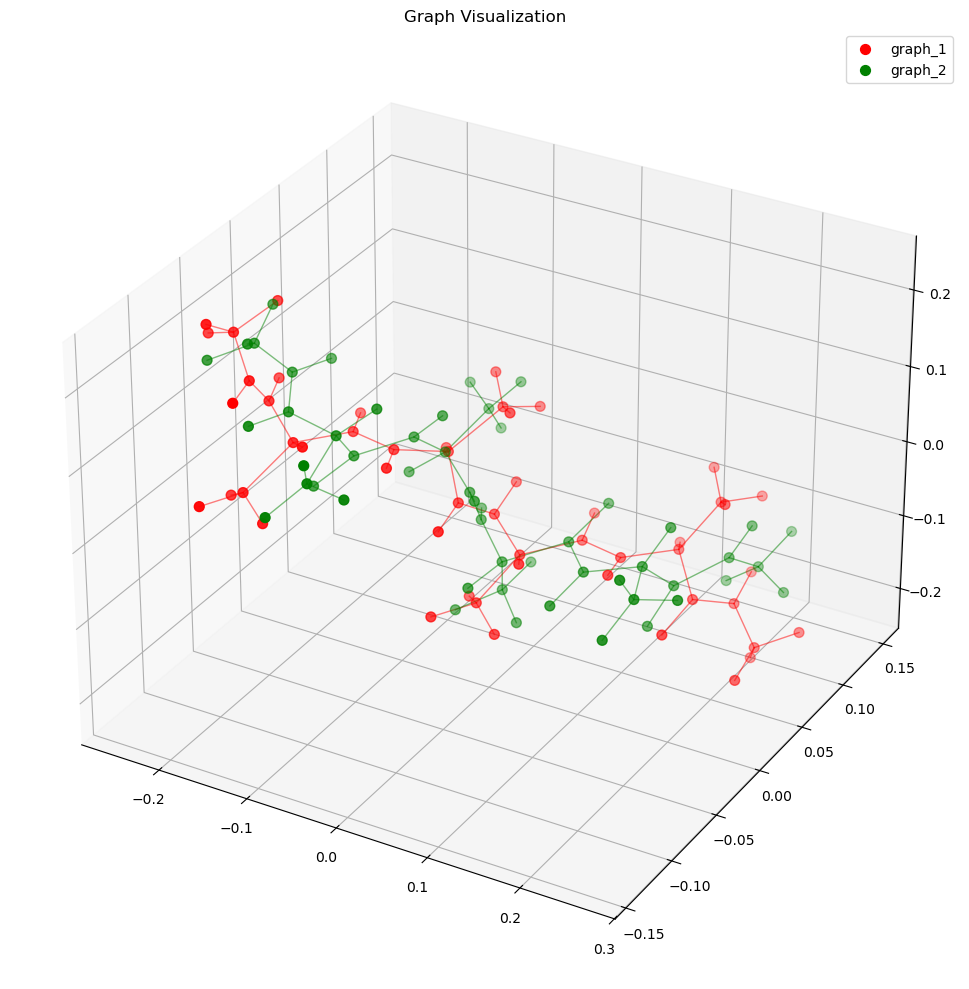

In [6]:
plot_graph(dataset, n_graphs=2, title='Graph Visualization')